Downloading dataset

In [0]:
!wget  https://github.com/zalandoresearch/fashion-mnist
!git clone https://github.com/keras-team/keras-tuner.git

In [0]:
%cd keras-tuner
!pip install .

Import libraries

In [0]:
from tensorflow.keras.datasets  import fashion_mnist
from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import Dense
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners          import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras           import utils
from random                     import randint
import matplotlib.pyplot as plt
import numpy as np
model = 0
# Download data
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

x_train = x_train.reshape(60000,784)
x_train = x_train / 255

x_test  = x_test.reshape(10000,784)
x_test  = x_test  / 255

In [0]:
y_train = utils.to_categorical(y_train,10)
y_test  = utils.to_categorical(y_test,10)

classes = ['T-shirt','shorts','sweater','dress','coat',
           'shoes','shirt','sneakers','bag','boots']


COMPILING...

In [0]:

# Creating model
model = Sequential()

# Add network's levels
model.add(Dense(800, input_dim=784,activation='relu'))
model.add(Dense(10,activation="softmax"))

# Compiling model
model.compile(loss="categorical_crossentropy",
              optimizer="SGD",metrics=["accuracy"])

print(model.summary())


Launch EarlyStopping Callback.

In [0]:
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=2)

EDUCATIONAL PROCESS

In [0]:
# Teaching processs
history = model.fit(x_train,y_train,batch_size=200,epochs=27,validation_split=0.2,verbose=2,callbacks=[early_stopping_callback])

SAVING MODEL

In [0]:
model.save('fashion_mnist_dense.h5')

In [0]:
print('The educational process has been stopped on epoch... ', early_stopping_callback.stopped_epoch)

Estimate educational quality

In [0]:

# Estimate educational quality of network on test data
scores  = model.evaluate(x_test, y_test, verbose=2) 
print("percentage of correct answers on test data, in percentage: ", round(scores[1] * 100, 4))


VIZUALIZATION OF NEURAL NETWORK HISTORY.

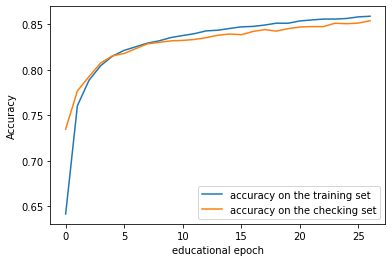

In [116]:
plt.plot(history.history['accuracy'],      label = 'accuracy on the training set')
plt.plot(history.history['val_accuracy'],  label = 'accuracy on the checking set')
plt.xlabel('educational epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

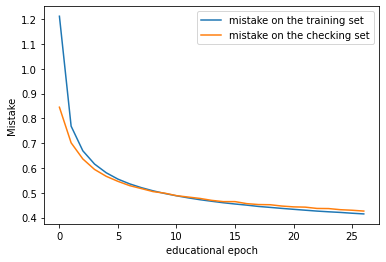

In [117]:
plt.plot(history.history['loss'],      label = 'mistake on the training set')
plt.plot(history.history['val_loss'],  label = 'mistake on the checking set')
plt.xlabel('educational epoch')
plt.ylabel('Mistake')
plt.legend()
plt.show()


LAUNCH

[1.4576666e-05 9.9986446e-01 4.7979256e-06 8.9918096e-05 2.5160245e-05
 2.3695796e-08 2.6739735e-07 1.5084166e-07 4.9056496e-07 4.8891039e-08]
1


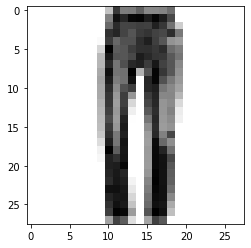

The Answer is shorts


In [118]:
# Launch network on input data
predictions = model.predict(x_test)
random_item = randint(0,10000)
# Print one of the results of recognition
print(predictions[random_item])

# Print  class number,which was predicted by neural-Network 
print(np.argmax(predictions[random_item]))
index = np.argmax(y_test[random_item])
plt.imshow(x_test[random_item].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print('The Answer is ' + classes[index])
